In [0]:
import tensorflow as tf
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import time
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import svm


In [2]:
print(f'Number of training images = {len(train_images)}')
print(f'Number of test images = {len(test_images)}')

Number of training images = 60000
Number of test images = 10000


In [3]:
print(f'Size of every image = {train_images[0].shape}')

Size of every image = (28, 28)


Reshaping the dataset

In [0]:
img_x, img_y = 28, 28
train_imgs = train_images.reshape(train_images.shape[0], img_x, img_y, 1)
test_imgs = test_images.reshape(test_images.shape[0], img_x, img_y, 1)
input_shape = (img_x, img_y, 1)

In [5]:
print('The train image dataset has shape:', train_imgs.shape)
print('The test image dataset has shape:',test_imgs.shape)

The train image dataset has shape: (60000, 28, 28, 1)
The test image dataset has shape: (10000, 28, 28, 1)


Normalizing the dataset

In [0]:
train_imgs = train_imgs / 255.0
test_imgs = test_imgs / 255.0

In [0]:
training_size = 6000
test_size = 1000

x_train_filter, y_train_filter = np.empty(shape=(training_size, 28, 28, 1)), []

for label in list(set(train_labels)):
    sample_filter = np.where((train_labels == label))
    x_train_filter = np.append(x_train_filter, np.array(train_imgs[sample_filter][:training_size]), axis=0)
    y_train_filter += [label]*training_size
    
x_train_filter = x_train_filter[training_size:,:,:]

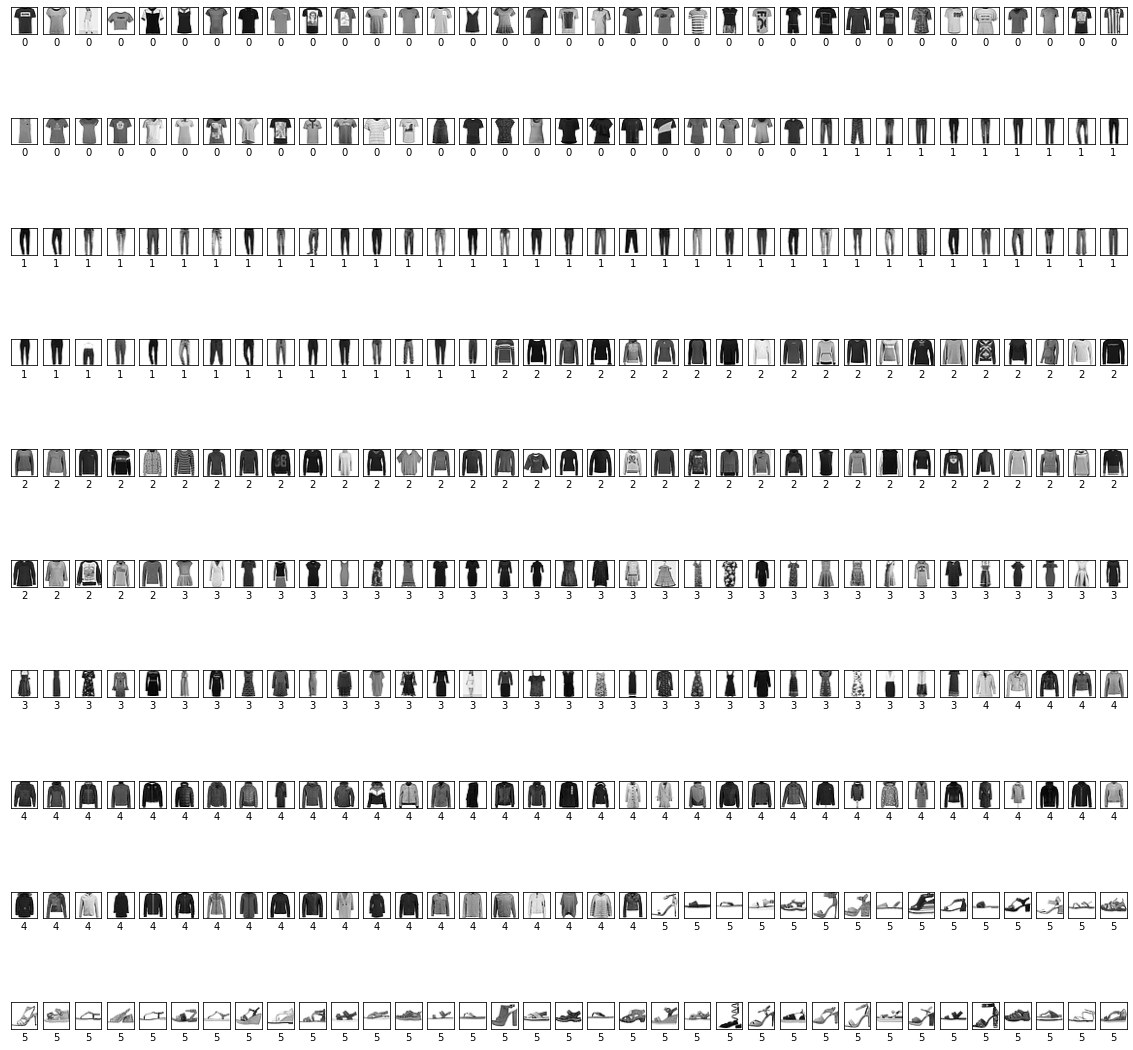

In [10]:
plt.figure(figsize=(20,20))
for i in range(0,35000,100):
    plt.subplot(10,35,i/100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_filter[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(y_train_filter[i])

In [0]:
train_imgs = train_imgs.reshape(training_size*10, 784) #28*28
test_imgs = test_imgs.reshape(test_size*10, 784)
train_lbls = np.eye(len(set(train_labels)))[train_labels]

In [10]:
print('The flattened train image dataset has shape:', train_imgs.shape)
print('The flattened test image dataset has shape:',test_imgs.shape)

The flattened train image dataset has shape: (60000, 784)
The flattened test image dataset has shape: (10000, 784)


<h2>Logistic regression</h2>

Training the model using logistic regression

In [24]:
x_train, x_test, y_train, y_test = train_test_split(train_imgs, train_labels, test_size=0.1, random_state=0)
logisticReg = LogisticRegression(max_iter=200, tol=1e-2,solver='saga')

% time logisticReg.fit(x_train, y_train)
# Time taken 1 min 33s

CPU times: user 1min 33s, sys: 13.1 ms, total: 1min 33s
Wall time: 1min 33s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.01, verbose=0,
                   warm_start=False)

Making predictions, calculating the accuracy, and generating the confusion matrix for the validation set.

CPU times: user 32.2 ms, sys: 2 ms, total: 34.2 ms
Wall time: 22.6 ms
Mean accuracy of the validation data = 0.8553333333333333


Text(0.5, 1.0, 'Accuracy score: 0.8553333333333333')

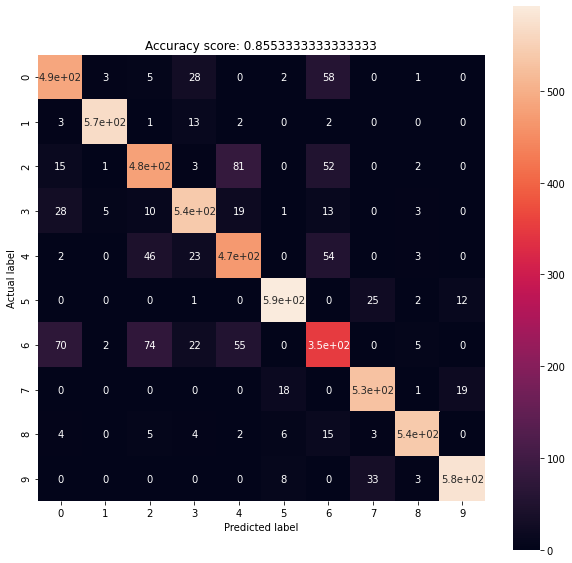

In [25]:
% time predictions = logisticReg.predict(x_test)
# Time taken = 34 ms

score = logisticReg.score(x_test, y_test)
print(f'Mean accuracy of the validation data = {score}')

conf_matrix = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(10,10))
sns.heatmap(conf_matrix, annot=True, square = True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy score: {0}'.format(score, size = 10))

Making predictions, calculating the accuracy, and generating the confusion matrix for the test set.

CPU times: user 52.4 ms, sys: 2.99 ms, total: 55.4 ms
Wall time: 36.5 ms
Mean accuracy of the test data = 0.845


Text(0.5, 1.0, 'Accuracy score: 0.845')

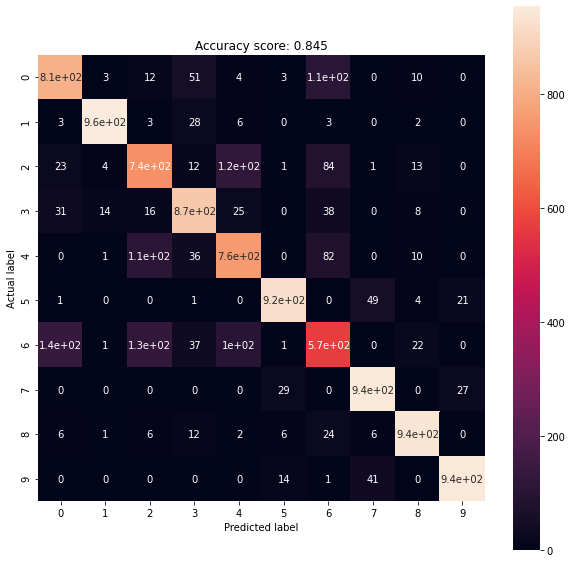

In [26]:
% time predictions = logisticReg.predict(test_imgs)
# Time taken = 55 ms

score = logisticReg.score(test_imgs, test_labels)
print(f'Mean accuracy of the test data = {score}')

conf_matrix = metrics.confusion_matrix(test_labels, predictions)
plt.figure(figsize=(10,10))
sns.heatmap(conf_matrix, annot=True, square = True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy score: {0}'.format(score, size = 10))

<h2>K nearest neighbours</h2>

Training the model using K nearest neighbour

In [27]:
x_train, x_test, y_train, y_test = train_test_split(train_imgs, train_labels, test_size=0.1, random_state=0)
KNN = KNeighborsClassifier(n_neighbors=5,algorithm='auto',n_jobs=10)

% time KNN.fit(x_train, y_train)
#  Time taken = 10 s

CPU times: user 9.94 s, sys: 15 ms, total: 9.95 s
Wall time: 9.98 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=10, n_neighbors=5, p=2,
                     weights='uniform')

Making predictions, calculating the accuracy, and generating the confusion matrix for the validation set.

CPU times: user 11min 37s, sys: 191 ms, total: 11min 37s
Wall time: 5min 53s
Mean accuracy of the validation data = 0.8575


Text(0.5, 1.0, 'Accuracy score: 0.8575')

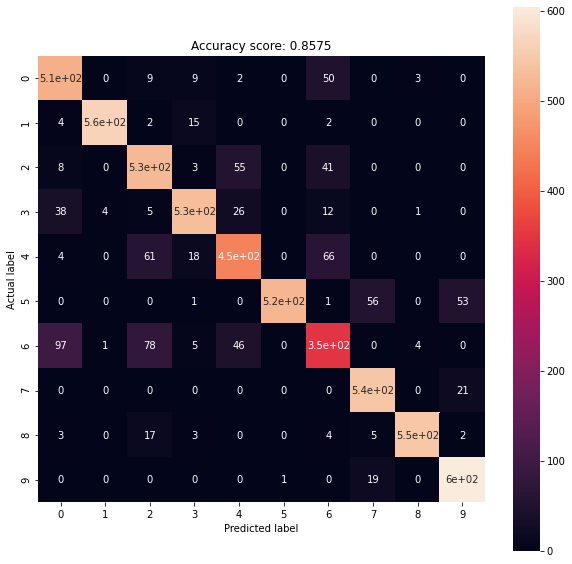

In [28]:
% time predictions = KNN.predict(x_test)
# Total time = 11 min 37 s

score = KNN.score(x_test, y_test)
print(f'Mean accuracy of the validation data = {score}')

conf_matrix = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(10,10))
sns.heatmap(conf_matrix, annot=True, square = True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy score: {0}'.format(score, size = 10))

CPU times: user 19min 14s, sys: 316 ms, total: 19min 15s
Wall time: 9min 45s
Mean accuracy of the test data = 0.8524


Text(0.5, 1.0, 'Accuracy score: 0.8524')

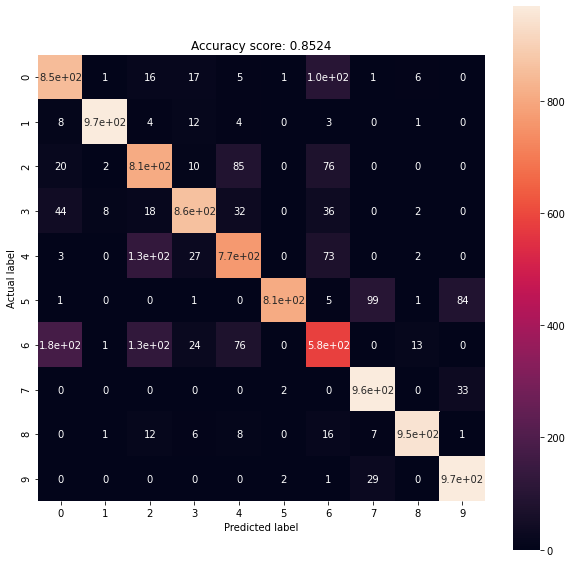

In [29]:
% time predictions = KNN.predict(test_imgs)
# Time taken = 19 min 15 s

score = KNN.score(test_imgs, test_labels)
print(f'Mean accuracy of the test data = {score}')

conf_matrix = metrics.confusion_matrix(test_labels, predictions)
plt.figure(figsize=(10,10))
sns.heatmap(conf_matrix, annot=True, square = True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy score: {0}'.format(score, size = 10))

<h2>Support vector machines with linear kernel</h2>

In [30]:
x_train, x_test, y_train, y_test = train_test_split(train_imgs, train_labels, test_size=0.1, random_state=0)
svc = svm.SVC(probability=False,kernel="linear",C=2.8,gamma=0.0073)
% time svc.fit(x_train,y_train)
# Time taken = 14 mins 48s

CPU times: user 14min 47s, sys: 221 ms, total: 14min 48s
Wall time: 14min 49s


SVC(C=2.8, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0073, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Making predictions, calculating the accuracy, and generating the confusion matrix for the validation set.

CPU times: user 2min 7s, sys: 10 ms, total: 2min 7s
Wall time: 2min 7s
Mean accuracy of the validation data = 0.8511666666666666


Text(0.5, 1.0, 'Accuracy score: 0.8511666666666666')

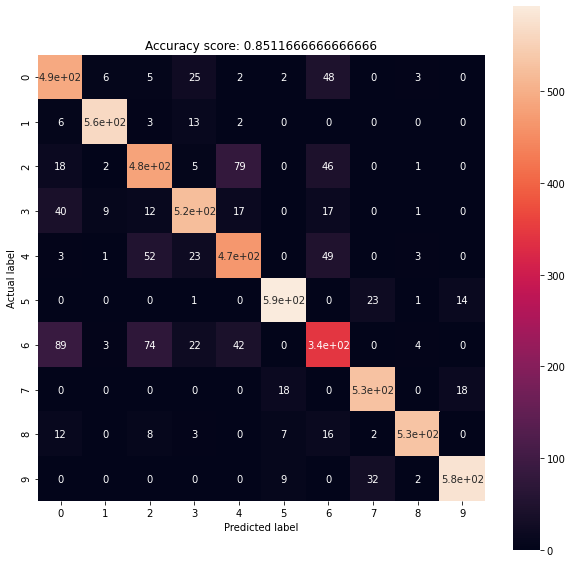

In [31]:
% time predictions = svc.predict(x_test)
# Total time = 2 min 7 s

score = svc.score(x_test, y_test)
print(f'Mean accuracy of the validation data = {score}')

conf_matrix = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(10,10))
sns.heatmap(conf_matrix, annot=True, square = True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy score: {0}'.format(score, size = 10))

CPU times: user 3min 31s, sys: 25.2 ms, total: 3min 31s
Wall time: 3min 32s
Mean accuracy of the test data = 0.8401


Text(0.5, 1.0, 'Accuracy score: 0.8401')

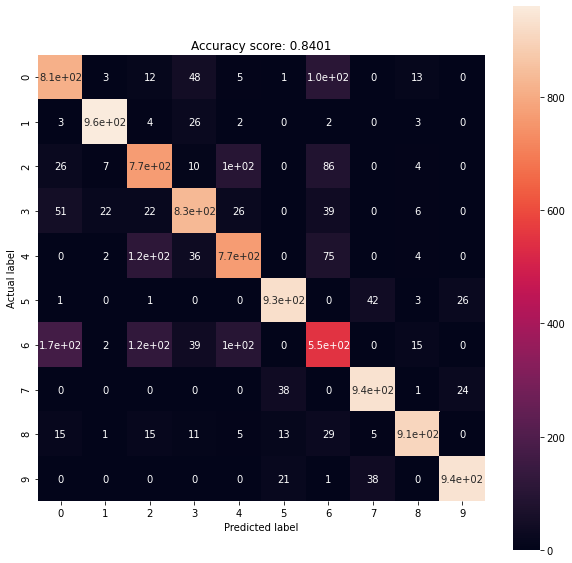

In [32]:
% time predictions = svc.predict(test_imgs)
# Time taken = 3 min 31s

score = svc.score(test_imgs, test_labels)
print(f'Mean accuracy of the test data = {score}')

conf_matrix = metrics.confusion_matrix(test_labels, predictions)
plt.figure(figsize=(10,10))
sns.heatmap(conf_matrix, annot=True, square = True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy score: {0}'.format(score, size = 10))

<h2>Support vector machines with rbf kernel</h2>

In [33]:
x_train, x_test, y_train, y_test = train_test_split(train_imgs, train_labels, test_size=0.1, random_state=0)
svc = svm.SVC(probability=False,kernel="rbf",C=2.8,gamma=0.0073)
% time svc.fit(x_train,y_train)
# Time taken = 9 min 47 sec

CPU times: user 9min 47s, sys: 142 ms, total: 9min 47s
Wall time: 9min 49s


SVC(C=2.8, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0073, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

CPU times: user 2min 21s, sys: 12.1 ms, total: 2min 21s
Wall time: 2min 22s
Mean accuracy of the validation data = 0.8975


Text(0.5, 1.0, 'Accuracy score: 0.8975')

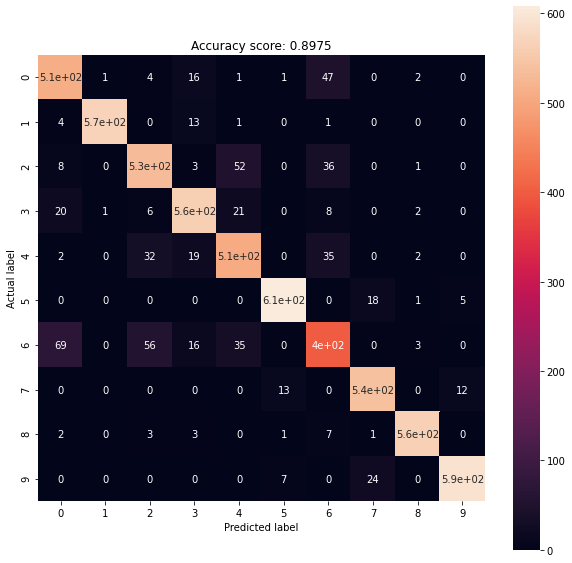

In [34]:
% time predictions = svc.predict(x_test)
# Total time = 

score = svc.score(x_test, y_test)
print(f'Mean accuracy of the validation data = {score}')

conf_matrix = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(10,10))
sns.heatmap(conf_matrix, annot=True, square = True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy score: {0}'.format(score, size = 10))

CPU times: user 3min 56s, sys: 28.1 ms, total: 3min 56s
Wall time: 3min 57s
Mean accuracy of the test data = 0.8873


Text(0.5, 1.0, 'Accuracy score: 0.8873')

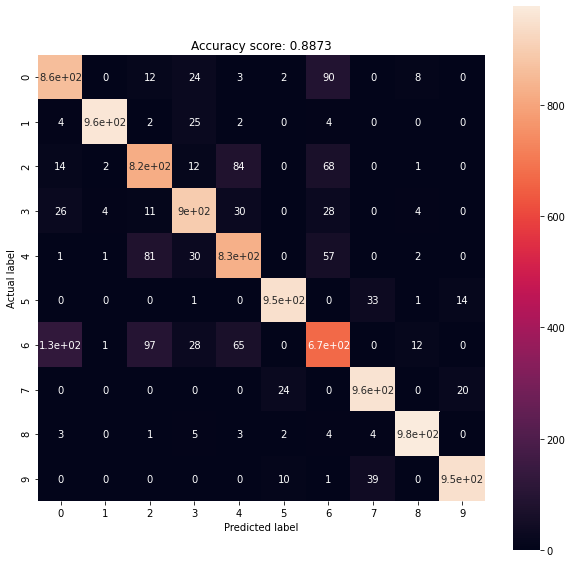

In [35]:
% time predictions = svc.predict(test_imgs)
# Time taken = 

score = svc.score(test_imgs, test_labels)
print(f'Mean accuracy of the test data = {score}')

conf_matrix = metrics.confusion_matrix(test_labels, predictions)
plt.figure(figsize=(10,10))
sns.heatmap(conf_matrix, annot=True, square = True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy score: {0}'.format(score, size = 10))

In [0]:
accuracy = [0.845, 0.845, 0.8401, 0.8873]

<h3>Part c</h3>

1. Logistic regression

>> Test set Accuracy =  0.845

2. Nearest neighbours

>> Test set Accuracy = 0.8524

3. SVM with linear kernel

>> Test set Accuracy = 0.8401

4. SVM with rbf kernel

>> Test set Accuracy = 0.8873

<h3>Part d</h3>

1. Logistic Regression

>> Train time = 1 min 33 sec

>> Test time = 55 ms

2. K nearest neighbours 

>> Train time = 10 s

>> Test time = 19 min 15 sec

3. SVM with linear kernel

>> Train time = 14 min 48 sec

>> Test time = 3 min 31 sec

4. SVM with rbf kernel

>> Train time = 9 min 47 sec

>> Test time = 3 min 56 sec

By looking at the resuts of part d, we can conclude a few things:

1. Logistic regreesion is the fastest when compared to the rest of the classifiers. Both train and test times are extremely low. We can also see that inspite of being fast, logistic regression gives a decent accuracy.

2. KNN has a very low training time because there is literally no training happening in this stage. All the work is done in the testing stage. Because of this the test time of KNN is the highest amomg the four. Accuracy of KNN is also quite decent.

3. SVM with linear kernel has the largest training time. But the test time is significantly lower than KNN. Accuracy of this comparable with KNN and logistic regression. 

4. SVM with rbf kernel has lesser training time than linear SVM. This algorithm has the highest accuracy among the four. Test time is almost the same as that of linear SVM. 

From these points we can conclue that the fastest algorithm is Logistic regression and the most accurate algorithm is SVM with rbf kernel. 